In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# !pip install umap-learn
from umap import UMAP

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"
nba = pd.read_csv(data_url).dropna()
nba.head()

Seas        Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...    FT%  ORB  \
0  2019  Álex Abrines  SG   25  OKC  31   2  19.0  1.8   5.1  ...  0.923  0.2   
1  2019    Quincy Acy  PF   28  PHO  10   0  12.3  0.4   1.8  ...  0.700  0.3   
2  2019  Jaylen Adams  PG   22  ATL  34   1  12.6  1.1   3.2  ...  0.778  0.3   
3  2019  Steven Adams   C   25  OKC  80  80  33.4  6.0  10.1  ...  0.500  4.9   
4  2019   Bam Adebayo   C   21  MIA  82  28  23.3  3.4   5.9  ...  0.735  2.0   

   DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  1.4  1.5  0.6  0.5  0.2  0.5  1.7   5.3  
1  2.2  2.5  0.8  0.1  0.4  0.4  2.4   1.7  
2  1.4  1.8  1.9  0.4  0.1  0.8  1.3   3.2  
3  4.6  9.5  1.6  1.5  1.0  1.7  2.6  13.9  
4  5.3  7.3  2.2  0.9  0.8  1.5  2.5   8.9  

[5 rows x 30 columns]

<IPython.core.display.Javascript object>

* Set the index to be a combination of player name and the season year
    * For example if a row's `Player` is "Adam Spannbauer" and its `Seas` is 2020, make the index say "Adam Spannbauer_2020"
* Drop the following columns from the dataset: `['Seas', 'Player', 'Age', 'Tm']`

In [3]:
nba["index"] = nba["Player"] + "_" + nba["Seas"].astype(str)

<IPython.core.display.Javascript object>

In [4]:
nba.columns

Index(['Seas', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'index'],
      dtype='object')

<IPython.core.display.Javascript object>

In [5]:
nba = nba.drop(columns=["Seas", "Player", "Age", "Tm"])

<IPython.core.display.Javascript object>

* How many different positions are there?

In [6]:
nba["Pos"].value_counts()

SG       458
PG       410
PF       386
SF       341
C        286
SF-SG      4
PF-C       3
SG-SF      2
PF-SF      2
C-PF       1
SG-PF      1
PG-SG      1
Name: Pos, dtype: int64

<IPython.core.display.Javascript object>

* Filter the data to remove the hybrid positions (the ones that have dashes in them)

In [7]:
nba["Pos"].filter(like="*-*", axis=0)

Series([], Name: Pos, dtype: object)

<IPython.core.display.Javascript object>

In [8]:
nba = nba[~nba["Pos"].str.contains("-")]

<IPython.core.display.Javascript object>

In [23]:
nba["Pos"]

0       SG
1       PF
2       PG
3        C
4        C
        ..
2135    SG
2136    PG
2137    SG
2138    PF
2139     C
Name: Pos, Length: 1881, dtype: object

<IPython.core.display.Javascript object>

* Make a pairplot of the data using `seaborn`.
    * Color by `'Pos'`
    * Restrict the plot to only show the `plot_cols` for the sake of speed/readability.
        * Don't drop the remaining columns from the `nba` dataframe.  Just restrict the columns for the plot.
* Any interesting relationships?

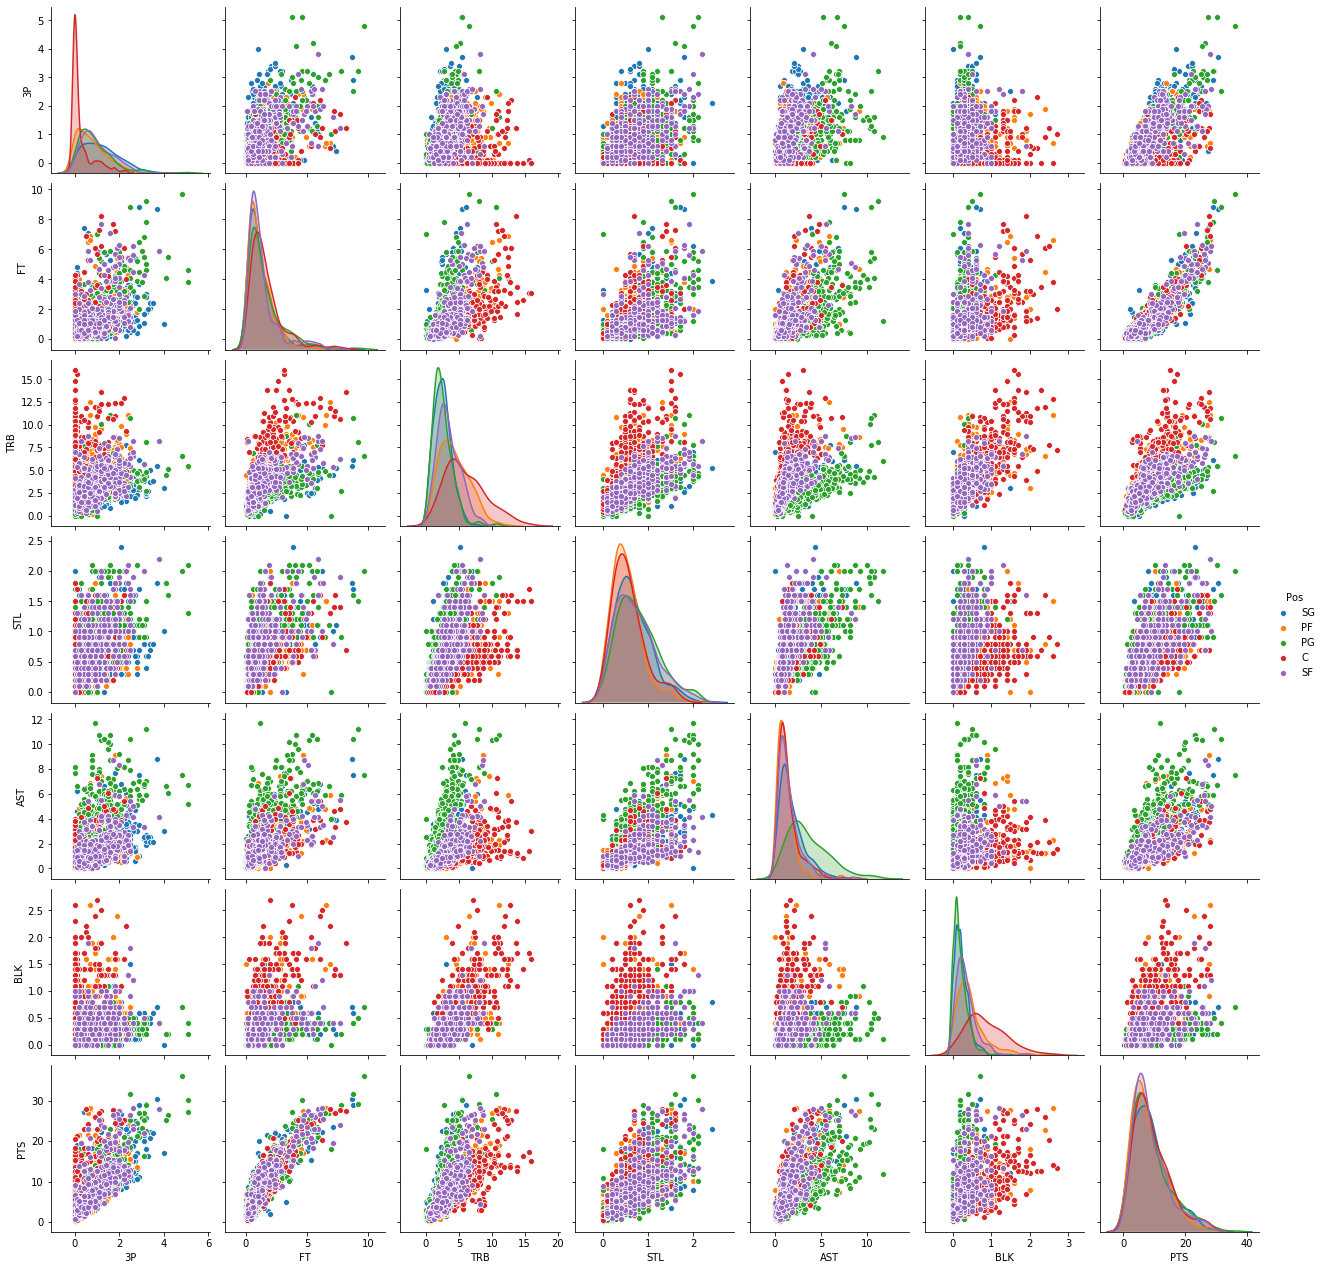

<IPython.core.display.Javascript object>

In [10]:
plot_cols = ["3P", "FT", "TRB", "STL", "AST", "BLK", "PTS", "Pos"]

sns.pairplot(nba[plot_cols], hue="Pos")
plt.show()

* Subset just the numeric columns from the dataframe
* Scale this subset of features

In [11]:
num_col = nba.select_dtypes(np.number)
scaler = StandardScaler()
scaled = scaler.fit_transform(num_col)

<IPython.core.display.Javascript object>

* Perform `PCA` to end up with 2 components
  * How much variation of the original data is explained by each component?
  * How much variation is explained by both components?
* Put these components in a DataFrame (name it `pca_df` so the next set of instructions makes sense)
  * Set the `index` to be the custom `nba.index` you created above
  * Add the `'Pos'` info into this new DataFrame

In [28]:
nba_o = nba.copy().set_index(nba["index"])
nba_o.head()

Pos   G  GS    MP   FG   FGA    FG%   3P  3PA    3P%  ...  \
index                                                                   ...   
Álex Abrines_2019  SG  31   2  19.0  1.8   5.1  0.357  1.3  4.1  0.323  ...   
Quincy Acy_2019    PF  10   0  12.3  0.4   1.8  0.222  0.2  1.5  0.133  ...   
Jaylen Adams_2019  PG  34   1  12.6  1.1   3.2  0.345  0.7  2.2  0.338  ...   
Steven Adams_2019   C  80  80  33.4  6.0  10.1  0.595  0.0  0.0  0.000  ...   
Bam Adebayo_2019    C  82  28  23.3  3.4   5.9  0.576  0.0  0.2  0.200  ...   

                   ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
index                                                             
Álex Abrines_2019  0.2  1.4  1.5  0.6  0.5  0.2  0.5  1.7   5.3   
Quincy Acy_2019    0.3  2.2  2.5  0.8  0.1  0.4  0.4  2.4   1.7   
Jaylen Adams_2019  0.3  1.4  1.8  1.9  0.4  0.1  0.8  1.3   3.2   
Steven Adams_2019  4.9  4.6  9.5  1.6  1.5  1.0  1.7  2.6  13.9   
Bam Adebayo_2019   2.0  5.3  7.3  2.2  0.9  0.8  1.5  2.5   8.9   

                               index  
index                                 
Álex Abrines_2019  Álex Abrines_2019  
Quincy Acy_2019      Quincy Acy_2019  
Jaylen Adams_2019  Jaylen Adams_2019  
Steven Adams_2019  Steven Adams_2019  
Bam Adebayo_2019    Bam Adebayo_2019  

[5 rows x 27 columns]

<IPython.core.display.Javascript object>

In [29]:
pca = PCA(2, random_state=69)
pca_df = pd.DataFrame(pca.fit_transform(scaled), index=nba["index"])
pca_df["Pos"] = nba_o["Pos"]

<IPython.core.display.Javascript object>

In [31]:
pca_df.columns

Index([0, 1, 'Pos'], dtype='object')

<IPython.core.display.Javascript object>

* Use `plotly.express` (imported as `px`) to create a scatter plot of the 2 components colored by `'Pos'`
  * The function you want is `px.scatter()`. Its usage is very similar to `sns.scatterplot()`.  Use the documenation to see how to use this function.
      * Set the `hover_name` parameter as: `hover_name=pca_df.index`.  This can be useful for investigating where points were placed.


In [42]:
x = 0
y = 1
px.scatter(
    pca_df, x, y, color="Pos", hover_name=pca_df.index,
)

<IPython.core.display.Javascript object>

* Perform `TSNE` to end up with 2 components
* Put these components in a DataFrame like we did for PCA output
  * Set the `index` to be `nba.index`
  * Add the position info into this new DataFrame

In [45]:
tsne = TSNE(2, perplexity=5)
tsne_df = pd.DataFrame(tsne.fit_transform(scaled), index=nba["index"])
tsne_df["Pos"] = nba_o["Pos"]
x = 0
y = 1
px.scatter(
    tsne_df, x, y, color="Pos", hover_name=tsne_df.index,
)

<IPython.core.display.Javascript object>

* Create the same scatter plot we did for the PCA output.


* Play with the `perplexity` parameter and see how this changes things
* In this case, which output do you think is better? PCA? TSNE? Why?

<IPython.core.display.Javascript object>

Repeat the same process for `UMAP`.

* Play with the `n_neighbors` and `min_dist` parameters and see how this changes things
* In this case, which output do you think is best? PCA? TSNE? UMAP? Why?

In [46]:
umap = UMAP(n_neighbors=2, min_dist=0.5)
umap_df = pd.DataFrame(umap.fit_transform(scaled), index=nba["index"])
umap_df["Pos"] = nba_o["Pos"]
x = 0
y = 1
px.scatter(
    umap_df, x, y, color="Pos", hover_name=umap_df.index,
)

<IPython.core.display.Javascript object>